In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pylab as plt
import seaborn as sns


In [5]:
user_data = pd.read_csv('https://drive.google.com/uc?id=1lVT5mLVDlvq39U6jquJuq2_hnrf8zwZm', encoding='latin-1')

In [6]:
user_data.head(4)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0


In [8]:
user_data.shape

(12000, 10)

In [9]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [25]:
user_engage = pd.read_csv('https://drive.google.com/uc?id=1AELBoyFLXbqIQxGWgkXS62S5NxzKe2gg', encoding='latin-1')

In [26]:
user_engage.shape

(207917, 3)

In [27]:
user_engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [28]:
# converting the time data into datetime object and set as index
user_engage.time_stamp = pd.to_datetime(user_engage.time_stamp)
user_engage.index=user_engage.time_stamp
user_engage.drop(labels='time_stamp',axis=1,inplace=True)


In [29]:
user_engage.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [30]:
# Separate the data for each user, organize each user's data into weekly chunks, and calculate the total activity for each user within each week.
df_agg = user_engage.groupby([pd.Grouper(freq='W'),'user_id']).sum()

In [32]:
# prompt: from df_agg find all user id's with a sum of 3 or more indicating an adopted user
df_adopt = df_agg[df_agg['visited'] >= 3].reset_index()['user_id'].unique()
adopted_users = pd.DataFrame(df_adopt,index=range(df_adopt.shape[0]),columns=['user_id'])

In [33]:
#join the two data frames and create df of all users
df_join = user_data.merge(adopted_users,how='inner',left_on='object_id',right_on='user_id')
df_join.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id
0,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2
1,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,10
2,20,2014-03-06 11:46:38,Helms Mikayla,lqyvjilf@uhzdq.com,SIGNUP,1.401364e+09,0,0,58,NaN,20
3,33,2014-03-11 06:29:09,Araujo José,JoseMartinsAraujo@cuvox.de,GUEST_INVITE,1.401518e+09,0,0,401,79.0,33
4,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,NaN,42


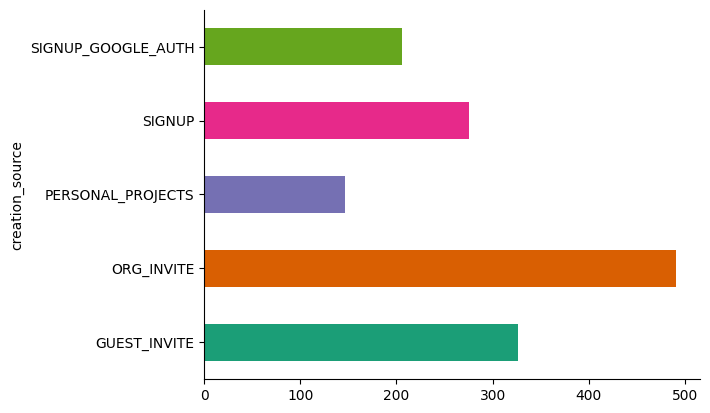

In [34]:
# visualizations
df_join.groupby('creation_source').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [43]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_source             1445 non-null   object 
 1   last_session_creation_time  1445 non-null   float64
 2   opted_in_to_mailing_list    1445 non-null   int64  
 3   enabled_for_marketing_drip  1445 non-null   int64  
 4   org_id                      1445 non-null   int64  
 5   invited_by_user_id          1445 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 67.9+ KB


In [40]:
#fill na values in invited_by_user column
df_join['invited_by_user_id'].fillna(value=0,inplace=True)

<ipython-input-40-5afa39ec866d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_join['invited_by_user_id'].fillna(value=0,inplace=True)


In [41]:
#drop irrelevant columns
drop_cols = list(df_join.columns[0:4])
drop_cols.append('user_id')
df_join.drop(labels=drop_cols,axis=1,inplace=True)

In [42]:
df_join.head()

,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,ORG_INVITE,1.396238e+09,0,0,1,316.0
1,ORG_INVITE,1.401833e+09,1,1,318,4143.0
2,SIGNUP,1.401364e+09,0,0,58,0.0
3,GUEST_INVITE,1.401518e+09,0,0,401,79.0
4,SIGNUP,1.401045e+09,1,0,235,0.0


In [46]:
#creating dummies for creation_source
#one hot encode creation_source feature
df_create = pd.get_dummies(df_join['creation_source'], dtype=int)
df_features = pd.concat([df_join,df_create],axis=1)
df_features.drop('creation_source',axis=1,inplace=True)

In [47]:
df_features.head()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1.396238e+09,0,0,1,316.0,0,1,0,0,0
1,1.401833e+09,1,1,318,4143.0,0,1,0,0,0
2,1.401364e+09,0,0,58,0.0,0,0,0,1,0
3,1.401518e+09,0,0,401,79.0,1,0,0,0,0
4,1.401045e+09,1,0,235,0.0,0,0,0,1,0


In [48]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   last_session_creation_time  1445 non-null   float64
 1   opted_in_to_mailing_list    1445 non-null   int64  
 2   enabled_for_marketing_drip  1445 non-null   int64  
 3   org_id                      1445 non-null   int64  
 4   invited_by_user_id          1445 non-null   float64
 5   GUEST_INVITE                1445 non-null   int64  
 6   ORG_INVITE                  1445 non-null   int64  
 7   PERSONAL_PROJECTS           1445 non-null   int64  
 8   SIGNUP                      1445 non-null   int64  
 9   SIGNUP_GOOGLE_AUTH          1445 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 113.0 KB


In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#scale data
scaler = StandardScaler()
features = scaler.fit_transform(df_features)

#fit PCA
pca = PCA()
components = pca.fit_transform(features)

In [50]:
np.sum(pca.explained_variance_ratio_[0:7])

np.float64(0.9227803367525595)

The first seven principal components acount for about 92.2% of the variation in the data.

In [51]:
df_comp = pd.DataFrame(pca.components_,columns=df_features.columns,index=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10'])
#absolute values of correlation with principal components
best_features = np.absolute(df_comp[np.absolute(df_comp) > 0.1])
best_features.head()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
PC-1,NaN,NaN,NaN,NaN,0.637653,0.232628,0.486575,0.233976,0.390324,0.296733
PC-2,NaN,0.695712,0.69891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PC-3,0.116892,NaN,NaN,NaN,NaN,0.784060,0.590037,NaN,NaN,NaN
PC-4,NaN,NaN,NaN,0.261476,NaN,NaN,NaN,0.108246,0.648711,0.697782
PC-5,0.230407,NaN,NaN,0.219055,NaN,NaN,NaN,0.825688,0.296054,0.350811


In [52]:
#sum correlations to get a relative estimate of the feature importance
best_features.head(7).sum(axis=0).sort_values(ascending=False)

,0
org_id,1.792770
SIGNUP_GOOGLE_AUTH,1.705164
last_session_creation_time,1.700941
SIGNUP,1.524752
PERSONAL_PROJECTS,1.438816
ORG_INVITE,1.076612
GUEST_INVITE,1.016688
enabled_for_marketing_drip,0.698910
opted_in_to_mailing_list,0.695712
invited_by_user_id,0.637653


### **CONCLUSION:**

The first seven principal components capture most of the variation in the dataset of adopted users, indicating that these variables are highly predictive of user adoption.

From the summarized correlations with the top principal components, three key features stand out:

1. Organization ID
2. Last Session Creation Time
3. Creation Source.

These factors play the most significant role in predicting future user adoption.